In [254]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from scipy.integrate import quad

import lilguys as lguys
from lilguys import units as lu
import arya

In [256]:
out = lguys.Output("../models/isolation/out")

In [264]:
prof_i = lguys.profile.Profile(snap_i)
prof_f = lguys.profile.Profile(snap_f)

shifting by [-0.28718746 -0.03772588  0.527067  ], [-0.00235902  0.0006826  -0.00334468]
shifting by [ 0.4329446  -0.77361184 -0.12206329], [ 6.8020383e-03 -9.7571829e-05  4.4054170e-03]


In [265]:
prof_i.compute_density()
prof_f.compute_density()

/tmp/ipykernel_93137/845409815.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(prof_f.r), np.log10(prof_f.nu_DM), label="final")


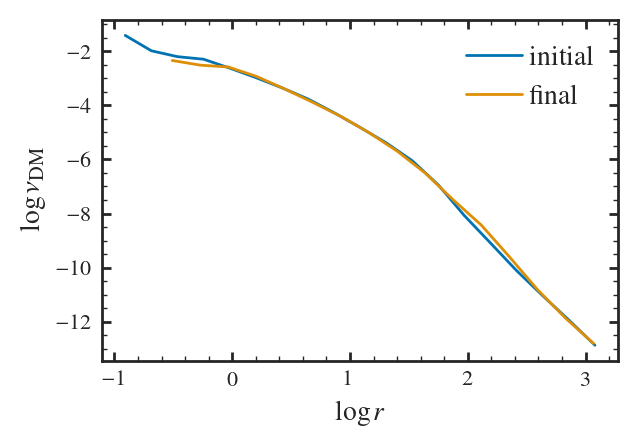

In [266]:
plt.plot(np.log10(prof_i.r), np.log10(prof_i.nu_DM), label="initial")
plt.plot(np.log10(prof_f.r), np.log10(prof_f.nu_DM), label="final")
plt.legend()
plt.ylabel(r"$\log \nu_{\rm DM}$")
plt.xlabel(r"$\log r$")
plt.savefig("isolation_profile.pdf")

Text(0.5, 0, '$\\log r$')

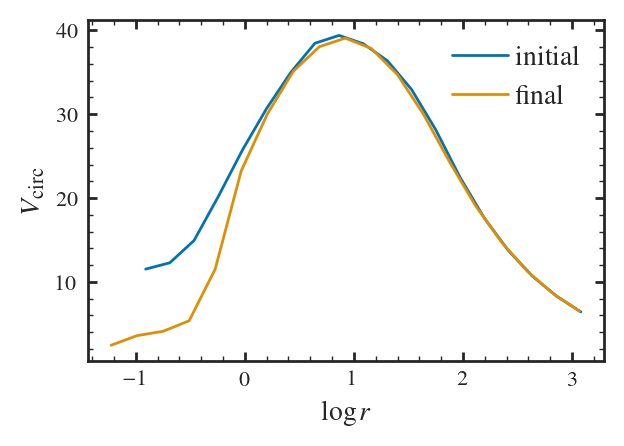

In [268]:
plt.plot(np.log10(prof_i.r), prof_i.Vc*lu.V_0, label="initial")
plt.plot(np.log10(prof_f.r), prof_f.Vc*lu.V_0, label="final")
plt.legend()
plt.ylabel(r"$V_{\rm circ}$")
plt.xlabel(r"$\log r$")


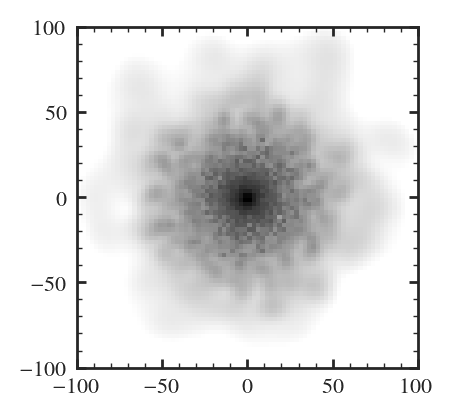

In [269]:
lguys.image.mag_image(snap_i.x, snap_i.y, eta=2, range=([-100, 100], [-100,100]), bins=80)

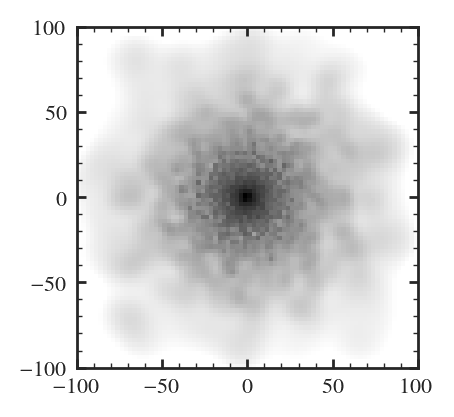

In [270]:
lguys.image.mag_image(snap_f.x, snap_f.y, eta=2, range=([-100, 100], [-100,100]), bins=80)

In [271]:
ke = lguys.profile.get_KE(out)
te = lguys.profile.get_Etot(out)

Text(0, 0.5, 'total energy')

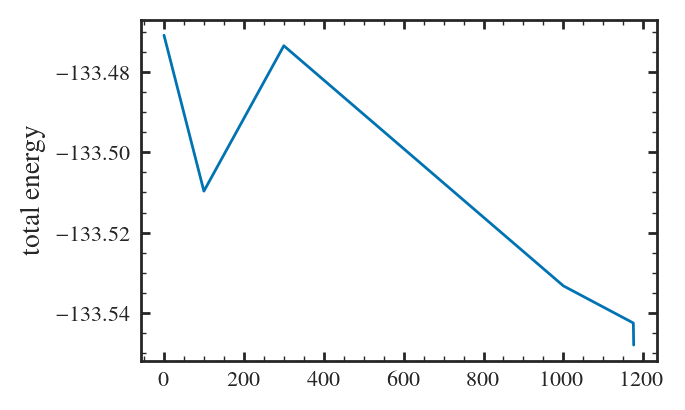

In [272]:
plt.plot(out.t, te)
plt.ylabel("total energy")

In [277]:
L = np.sum(out.m * np.cross(out.pos, out.vel), axis=1)

In [279]:
2

2

Text(0, 0.5, 'L')

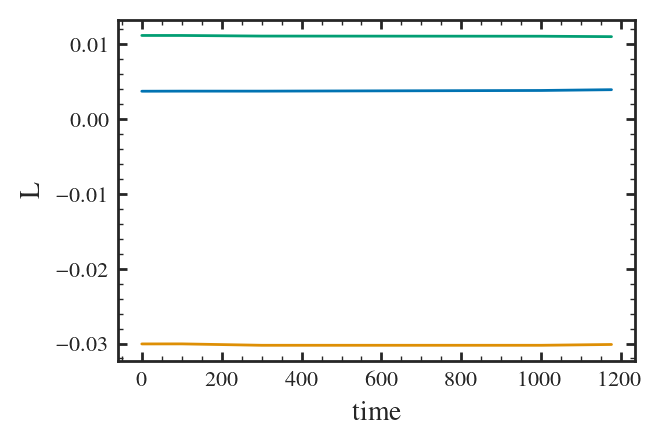

In [278]:
for i in range(3):
    plt.plot(out.t, L[:, i])
plt.xlabel("time")
plt.ylabel("L")

# Scratch

In [283]:
snap_f.epsilon = 0.08

In [291]:
lguys.gravity.phi([0.53, -0.65, 0.18], snap_f)

-0.14153778282288076

In [292]:
np.argnub(snap_f.potential)

-0.14074127

In [294]:
from scipy.optimize import fmin_cg

In [354]:
N = 10_000
x = np.random.normal(0, 1, (N, 3))
v = np.zeros((N, 3))
epsilon = 1/np.sqrt(N)
snap = lguys.Snapshot(x, v, epsilon=epsilon, m=1)
snap.calc_potential()

In [355]:
p0 = lguys.gravity.min_phi(snap)

         Current function value: -8079.692427
         Iterations: 0
         Function evaluations: 57
         Gradient evaluations: 45


In [ ]:
np.mea

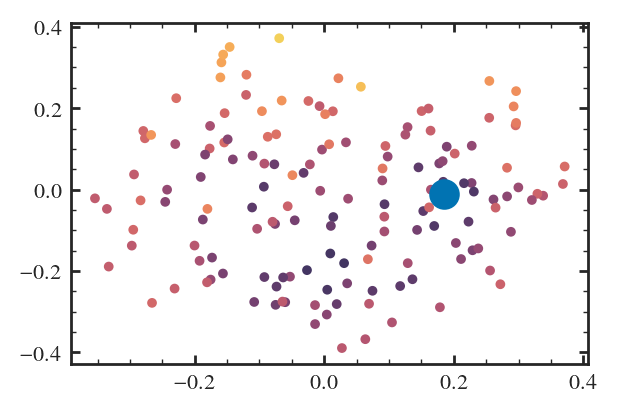

In [358]:
s = snap.filter(snap.r < 0.4)
plt.scatter(s.x, s.y, c=s.potential)
plt.scatter(p0[0], p0[1], s=100)